In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Questioning

BERT, BI-LSTM and all those fantastic models work great! But i think we should try with this data set a simpler aproach! Using models that are easily accessible to a begginner such as Naive-Bayes.

# Importing data

In [2]:
df = pd.read_csv(r"../input/nlp-getting-started/train.csv")
df.shape

(7613, 5)

In [3]:
df.sample(2)

,id,keyword,location,text,target
6648,9524,terrorist,NaN,@BarackObama Senator John McCainÛªs Whoops Mo...,0
4429,6302,hostage,NaN,@susanj357 @msnbc @allinwithchris it's like wa...,0


# Checking label distribution

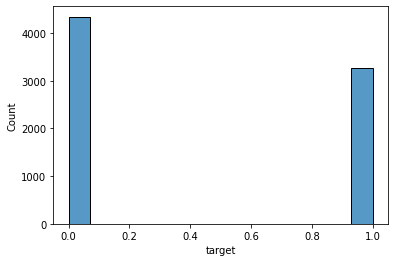

In [4]:
sns.histplot(df['target']);

# Deleting unnecessary features

In [5]:
df = df.drop(labels=['id','location'],axis=1)

# Checking for null values (NaN)

In [6]:
df.isna().sum()

keyword    61
text        0
target      0
dtype: int64

# Checking for duplicated values 

In [7]:
 df['text'].duplicated().sum()

110

# Deleting duplicates

In [8]:
df = df.drop_duplicates(subset=['text'],keep=False)


# Creating a target variable for binary classification

In [9]:
df = df.dropna()
y_df = df['target']
df = df.drop(labels=['target'],axis=1)


# Reseting index

In [10]:
df = df.reset_index()
df = df.drop(labels=['index'],axis=1)

# Replacing odd writing in Dataset
This step will facilitate tokenization!

In [11]:
df['keyword'] = df['keyword'].str.replace('%20',' ')
df['keyword'].sample(50)

3295               explode
4215              hijacker
3621                  fire
4106             hazardous
4911      natural disaster
2552           destruction
1794                 crush
2778               drought
4164              hellfire
4691         mass murderer
4997            obliterate
5463              refugees
3073        emergency plan
3115    emergency services
3144              engulfed
479              avalanche
6943               volcano
1129       bridge collapse
7199               wounded
2649            devastated
5475              refugees
4487             inundated
4211              hijacker
3172             epicentre
6697           traumatised
4950       nuclear reactor
1709                 crash
5819               screams
1253               burning
5085             oil spill
3421            eyewitness
3507            fatalities
5573                  riot
6424             terrorism
4163              hellfire
923               body bag
3312               explode
5

# Encoding the 'keyword' Column

In [12]:
keyword_dummies = pd.get_dummies(df['keyword'])

# Simple algorithm for text cleansing (Extracting the Vocabulary set!)

This simple algorithm checks for weird or wrong characters in strings,
and if a string is found, it will not enter in our vocabulary!

E.g :. '3672hjdkhj' is a string that should not enter our model!

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

text_vectorizer = vect.fit_transform(df['text'])

arr = vect.get_feature_names_out()
forbidden = ['0','1','2','3','4','5','6','7','8','9','_','@','ü','ò','û','$','%','*','#','/','â','!','[',']','.',';','ç','>','å']
stop = []
i = -1
for item in arr:
  i = i+1
  for letter in item:
    if letter in forbidden:
      stop.append(item)
print(len(stop))

11039


# Creating our vocabulary with set operations

A set is a very simple data structure in which scikit-learn requires us to use, for vocabulary.

we are removing from arr (which contains all the words), those that are unwanted (contained in the 'stop' set).


In [14]:
stop = set(stop)
arr = set(arr)
vocab = arr - stop
len(vocab)

15764

# Tokenizing our data using our vocabulary

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vect2 = CountVectorizer(stop_words='english',vocabulary=vocab)

text_vectorizer2 = vect2.fit_transform(df['text'])

arr2 = vect2.get_feature_names()

# Data Frame created with 'text' column tokenization

In [16]:
text_df = pd.DataFrame(text_vectorizer2.toarray())
text_df

,0,1,2,3,4,5,6,7,8,9,...,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating a fully pre-processed df

(hence the name 'proc_df', processed_df)

In [17]:
proc_df = pd.concat([keyword_dummies,text_df],axis=1)

In [18]:
proc_df

,ablaze,accident,aftershock,airplane accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,...,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data: train and test

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(proc_df,y_df)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((5533, 15985), (1845, 15985), (5533,), (1845,))

# Training the model

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=0.01873817422860384)
model.fit(proc_df,y_df)

GaussianNB(var_smoothing=0.01873817422860384)

# Classification report!

In [21]:
from sklearn.metrics import classification_report 
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1065
           1       0.88      0.76      0.81       780

    accuracy                           0.85      1845
   macro avg       0.86      0.84      0.85      1845
weighted avg       0.85      0.85      0.85      1845



# Importing test data

In [22]:
test_df = pd.read_csv(r'../input/nlp-getting-started/test.csv')

In [23]:
index = test_df['id']

test_df = test_df[['keyword','text']]

test_df

,keyword,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# Pre-processing test data

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
test_df['keyword'] = imputer.fit_transform(test_df['keyword'].values.reshape(-1, 1))
test_df['text'] = imputer.fit_transform(test_df['text'].values.reshape(-1, 1))

In [25]:
test_df.isna().sum()

keyword    0
text       0
dtype: int64

In [26]:
test_df['keyword'] = test_df['keyword'].str.replace('%20',' ')
test_df['keyword'].sample(50)

2709         stretcher
2427           rescued
1208       devastation
2038       mass murder
2504              ruin
1882           hostage
792            crashed
1190        devastated
2704         stretcher
98         annihilated
1210       devastation
281       bioterrorism
888             danger
3090           volcano
2598          sinkhole
3183         windstorm
2687             storm
2746    suicide bomber
110       annihilation
2492            rubble
2653             smoke
807            crashed
2371         rainstorm
162               army
434           body bag
2807           survive
569             burned
1467           explode
2291             panic
1276             drown
1954         inundated
2894           thunder
2810           survive
27              ablaze
765          collision
381              blood
2982            trauma
788              crash
2525         sandstorm
3240          wreckage
1587        fire truck
2833         survivors
746            collide
290        

In [27]:
keyword_dummies_TEST = pd.get_dummies(test_df['keyword'])

In [28]:
keyword_dummies_TEST

,ablaze,accident,aftershock,airplane accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,...,weapons,whirlwind,wild fires,wildfire,windstorm,wounded,wounds,wreck,wreckage,wrecked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Tokenizing test data, extracting its own vocabulary

PS... We are extracting the test data vocabulary, but we will not use it! It is just for demonstration purposes!

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
test_vect = CountVectorizer(stop_words='english')

text_vectorizer = test_vect.fit_transform(test_df['text'])

arrt = test_vect.get_feature_names_out()
forbidden = ['0','1','2','3','4','5','6','7','8','9','_','@','ü','ò','û','$','%','*','#','/','â','!','[',']','.',';','ç','>','å']
stop = []
i = -1
for item in arrt:
  i = i+1
  for letter in item:
    if letter in forbidden:
      stop.append(item)
stopt = set(stop)
arrt= set(arrt)
vocabt = arrt - stopt
len(vocabt)

9469

In [30]:
len(vocabt),len(vocab)

(9469, 15764)

# Tokenizing test data

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
test_vect2 = CountVectorizer(stop_words='english',vocabulary=vocab)
test_text_vectorizer2 = test_vect2.fit_transform(test_df['text'])

In [32]:
text_df_TEST = pd.DataFrame(test_text_vectorizer2.toarray())
text_df_TEST

,0,1,2,3,4,5,6,7,8,9,...,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
proc_df_TEST = pd.concat([keyword_dummies_TEST,text_df_TEST],axis=1)


# Fully pre-processed test DataFrame

In [34]:
proc_df_TEST

,ablaze,accident,aftershock,airplane accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,...,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
model.fit(proc_df,y_df)

GaussianNB(var_smoothing=0.01873817422860384)

In [36]:
y_pred_submiss = model.predict(proc_df_TEST)

# Creating submission DataFrame

In [37]:
final_df = pd.DataFrame()

final_df['id'] = index
final_df['target'] = y_pred_submiss

In [38]:
final_df
final_df['target'].value_counts()


0    2146
1    1117
Name: target, dtype: int64

# Submitting!

In [39]:
final_df.to_csv('submission.csv',index = False)
